In [ ]:
# The aim of this script is to pull necessary information 
# from a graph (nodes, edges) such as start and end nodes of an edge 
# to compare these and determine the connection on that edge (open or closed)
# After the open/closed data is put into the nodes' nested dictionary
# to define the module type 

# disclaimer: nodes dictionary and edge list are dummies for the sake of developing the code
# see "merged script" for our case study 

In [124]:
#initialisation
import networkx as nx

In [125]:
#definitions
#gives adjacency dictionary
edge_dict={}
def create_edge_dict(graph):
    for i, n in G.adjacency():
        # print("i is",i)
        # print("n is",n)
        edge_dict[i] = list(n)
    return edge_dict

# gives the parent of the value in a nested dictionary
def find_key(d, value):
    start_list =[]
    for i in value:
        # print("i is", i)
        for k,v in d.items():
            # print("k and v is", k,v)
            if v['name'] == i:
                # print("k is", k)
                start_list.append(i)
    return start_list

#gives the value of tag key of a node
def retrieve_tag(list):
    tag_list = []
    for i in list:
        # print ("i is", i)
        tag = nodes[i]['tag']
        # print(tag)
        tag_list.append(tag)
    return (tag_list)

In [126]:
#nodes and edges data
nodes = {
    0: {"name":0,"type":None,"use_frequency":"D", "units":None,"tag":0, "floor":0},
    1: {"name":1,"type":"S","use_frequency":"D", "units":"3","tag":"Chris", "floor":0},
    2: {"name":2,"type":"S","use_frequency":"D", "units":"3","tag":"Chris", "floor":0},
    3: {"name":3,"type":"S","use_frequency":"D", "units":"3","tag":"Eren", "floor":1},
    4: {"name":4,"type":"S","use_frequency":"D", "units":"3","tag":"Felipe", "floor":1},
    5: {"name":5,"type":"S","use_frequency":"D", "units":"3","tag":1, "floor":1}
}
#print (nodes[4]['name'])

# edges = (("A","B"),("B","C"),("C","D"),("D","A"))
# print(edges)

edges= ((nodes[0]['name'],nodes[1]['name']),(nodes[0]['name'],nodes[2]['name']),(nodes[0]['name'],nodes[3]['name']),(nodes[0]['name'],nodes[4]['name']),(nodes[3]['name'],nodes[4]['name']))

print (edges)

((0, 1), (0, 2), (0, 3), (0, 4), (3, 4))


{0: [1, 2, 3, 4], 1: [0], 2: [0], 3: [0, 4], 4: [0, 3]}


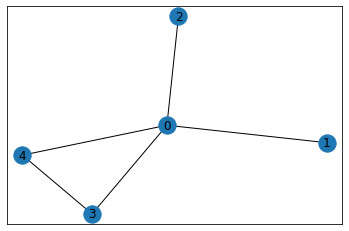

In [127]:
#draw the graph
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)

nx.draw_networkx(G, pos)

#get adjacency dictionary
edge_dict = create_edge_dict(G)
print(edge_dict)

In [128]:
#find start and end nodes of edges
start_point, end_point = zip(*edges)
start = list (start_point)
end = list (end_point)
print(start)
print (end)

[0, 0, 0, 0, 3]
[1, 2, 3, 4, 4]


In [129]:
#find start and end point of each edge
parent_start = (find_key(nodes, start))
parent_end = (find_key(nodes,end))
print (parent_start)
print (parent_end)

[0, 0, 0, 0, 3]
[1, 2, 3, 4, 4]


In [130]:
#Get the value /'tag'/ in dictionary by nodes' dictionarys parent
start_tag = retrieve_tag (parent_start)
end_tag = retrieve_tag (parent_end)
# print(start_tag)
# print(end_tag)
node_tag = []
node_tag.append(start_tag)
node_tag.append(end_tag)
print (node_tag)

[[0, 0, 0, 0, 'Eren'], ['Chris', 'Chris', 'Eren', 'Felipe', 'Felipe']]


In [131]:
#Compare the tags of start and end nodes of edges
#Gives the edge condition wheter there is a wall or it is open : closed (1) or open (0)
edge_oc_list = []
for i in range (len (node_tag[0]) ):
    item1 = node_tag[0][i]
    item2 = node_tag[1][i]
    # print ("item 1 is" + item1)
    # print (item2)
    # first_item.append(item1)
    # last_item.append(item2)
    if item1 == item2:
        edge_oc = (0)
        edge_oc_list.append(edge_oc)
    elif (item1 == 0) or (item2 == 0) :
        edge_oc_street =(0)
        edge_oc_list.append(edge_oc_street)
    elif (item1 == 1) or (item2 == 1) :
        edge_oc_none =(1)
        edge_oc_list.append(edge_oc_none)
    else:
        edge_oc_closed = (1)
        edge_oc_list.append(edge_oc_closed)
edge_oc_list
copy_edge_oc_list=edge_oc_list
print(edge_oc_list)

[0, 0, 0, 0, 1]


In [132]:
#create a dictionary of nodes and the connection(open or closed) that node has
# each node is connected to 4 edges --> [open,open,closed,closed] = [0,0,1,1]
edge_list = list (edges)
edge_dict_connection={}
for k in range(len(nodes)):
       edge_dict_connection[k]=[]
       for i in range(len(edge_list)):
              if k == edge_list[i][0]:
                     edge_dict_connection[k].append(edge_oc_list[i])
print(edge_dict_connection)

{0: [0, 0, 0, 0], 1: [], 2: [], 3: [1], 4: [], 5: []}


In [133]:
# #adds the connection data (eg:[0,0,0,0]) to nodes dictionary
# #nodes is a dictionary
edge_list = list (edges)
for k in range(len(nodes)):
       nodes[k]["connection"]=[]
       for i in range(len(edge_list)):
              # print("i is", i)
              if k == edge_list[i][0]:
                     # print("k is", edge_list[i][0])
                     nodes[k]["connection"].append(edge_oc_list[i])
                     # print(edge_oc_list[i], "is appended")
print(nodes)

{0: {'name': 0, 'type': None, 'use_frequency': 'D', 'units': None, 'tag': 0, 'floor': 0, 'connection': [0, 0, 0, 0]}, 1: {'name': 1, 'type': 'S', 'use_frequency': 'D', 'units': '3', 'tag': 'Chris', 'floor': 0, 'connection': []}, 2: {'name': 2, 'type': 'S', 'use_frequency': 'D', 'units': '3', 'tag': 'Chris', 'floor': 0, 'connection': []}, 3: {'name': 3, 'type': 'S', 'use_frequency': 'D', 'units': '3', 'tag': 'Eren', 'floor': 1, 'connection': [1]}, 4: {'name': 4, 'type': 'S', 'use_frequency': 'D', 'units': '3', 'tag': 'Felipe', 'floor': 1, 'connection': []}, 5: {'name': 5, 'type': 'S', 'use_frequency': 'D', 'units': '3', 'tag': 1, 'floor': 1, 'connection': []}}


In [134]:
#create a list of types having the info of connections and floor(1 story or 2 story)
# Type1 = [0,0,0,0],[0]
# Type2 = [0,1,0,0],[0]
# Type3 = [0,1,0,1],[0]
# Type4 = [0,0,1,1],[0]
# Type5 = [0,1,1,1],[0]
# Type11 = [0,0,0,0],[1]
# Type22 = [0,1,0,0],[1]
# Type33 = [0,1,0,1],[1]
# Type44 = [0,0,1,1],[1]
# Type55 = [0,1,1,1],[1]

#connection conditions
C1 = nodes[i]["connection"]==[0,0,0,0]
C2 = (nodes[i]["connection"]==[0,1,0,0]) or (nodes[i]["connection"]==[0,0,1,0]) or (nodes[i]["connection"]==[0,0,0,1]) or (nodes[i]["connection"]==[1,0,0,0])
C3 = (nodes[i]["connection"]==[0,0,1,1]) or (nodes[i]["connection"]==[0,1,1,0]) or (nodes[i]["connection"]==[1,1,0,0]) or (nodes[i]["connection"]==[1,0,0,1])
C4 = (nodes[i]["connection"]==[0,1,1,1]) or (nodes[i]["connection"]==[1,1,1,0]) or (nodes[i]["connection"]==[1,1,0,1]) or (nodes[i]["connection"]==[1,0,1,1])
C5 = (nodes[i]["connection"]==[0,1,0,1] or (nodes[i]["connection"]==[1,0,1,0]))

#floor conditions
F1 = (nodes[i]["floor"]==0)
F2 = (nodes[i]["floor"]==1)

In [135]:
#assigns module types to nodes according to connections
for k in nodes:
    for i in nodes:
        nodes[i]["module"]=[]
        if (C1) and (F1):
            nodes[i]["module"] = 1
        elif (C2) and (F1):
            nodes[i]["module"] = 2
        elif (C3)  and (F1):
            nodes[i]["module"] = 3
        elif (C4) and (F1):
            nodes[i]["module"] = 4
        elif (C5) and (F1):
            nodes[i]["module"] = 5
        elif (C1) and (F2):
            nodes[i]["module"] = 11
        elif (C2) and (F2):
            nodes[i]["module"] = 22
        elif (C3) and (F2):
            nodes[i]["module"] = 33
        elif (C4) and (F2):
            nodes[i]["module"] = 44
        elif (C5) and (F2):
            nodes[i]["module"] = 55
        
            nodes[i]["module"] = []

In [136]:
nodes

{0: {'name': 0,
  'type': None,
  'use_frequency': 'D',
  'units': None,
  'tag': 0,
  'floor': 0,
  'connection': [0, 0, 0, 0],
  'module': []},
 1: {'name': 1,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 'Chris',
  'floor': 0,
  'connection': [],
  'module': []},
 2: {'name': 2,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 'Chris',
  'floor': 0,
  'connection': [],
  'module': []},
 3: {'name': 3,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 'Eren',
  'floor': 1,
  'connection': [1],
  'module': []},
 4: {'name': 4,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 'Felipe',
  'floor': 1,
  'connection': [],
  'module': []},
 5: {'name': 5,
  'type': 'S',
  'use_frequency': 'D',
  'units': '3',
  'tag': 1,
  'floor': 1,
  'connection': [],
  'module': []}}